<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/Math345_LAB_W7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing $2$ populations: $t$-statistics

Given two distinct populations:
 



> *Note:* 
*   if the sample sizes are small, the distributions are important (should be normal)
*   if the sample sizes are large, the distributions are not important (need not be normal)


The test comparing two independent population means with unknown and possibly unequal population standard deviations is called the Aspin-Welch $t$-test. The degrees of freedom formula was developed by Aspin-Welch.

The comparison of two population means is very common. A difference between the two samples depends on both the means and the standard deviations. Very different means can occur by chance if there is great variation among the individual samples. In order to account for the variation, we take the difference of the sample means, $\bar{X}_{1} - \bar{X}_{2}$ , and divide by the
standard error in order to standardize the difference. The result is a $t$-score test statistic.

Depending on the nature of you datasets, one can calculate the $t$ statistc via two ways. If one randomly extracts samples from each distribution,  the test statistic ($t$-test) is calculated as:

$$
\frac{(\bar{X}_{1} - \bar{X}_{2}) - (\mu_{1} - \mu_{2}) }{\sqrt{\frac{s_1^2}{n_1} - \frac{s_2^2}{n_2} } }.
$$

In a special case where each distribution reflects information about the same quantites (for example you have $100$ people give ratings on the quality of coffee from $2$ different coffee shops), one can used the matched $t$ statistcs. In this case  the test statistic ($t$-test) is calculated as:

$$
\frac{(\bar{X}_{1} - \bar{X}_{2}) - (\mu_{1} - \mu_{2}) }{standard~error~of~difference }.
$$

In both cases the difference between the population means $\mu_1 - \mu_2$ is related to your null hypothesis $H_0$. 

When performing the Hypothesis test, you will use the $t$ statistic instead of the $z$ statistic to compute the $p$ value.

Problem:

Consider the $CO_2$ emssion per capital in the years $1950$ and $2019$.
1.   Provide a comprehensive description of each population (yes, that includes a histogram with a title and labeled axis).
2.   Is there a difference in the average $CO_2$ emission per capital between those years? Test using a $5\%$ level of significance and a data sample of $n = 75$ countries using the simple $t$ statistic. (Repeat the test $50$ times on different samples)
3.   Is there a difference in the average $CO_2$ emission per capital between those years? Test using a $5\%$ level of significance and a data sample of $n = 75$ countries using the matched $t$ statistic. (Repeat the test $50$ times on different samples)
4.   Based on your obseravtions and the data you're using motivate in a paragraph ($5-6$ sentances) which $t$ test is more appropriate for this analysis, and provide an example situation when the other $t$ test could be more suitable. 

For each case clearly state the null and alternative hypothesis, $H_0$ and $H_a$, indicate and elaborate on the Type of Error you could make in each case.

When processing the dataframe, drop the following entities:


```
# Africa, Asia, Asia (excl. China & India) ,EU-27, EU-28, Europe Europe (excl. EU-27), Europe (excl. EU-28), International transport, 
  North America, North America (excl. USA), South America, World
```




In [ ]:
# Your Solution goes here
# Use as many cells as you need

In [276]:
from google.colab import files 

import numpy as np
import pandas as pd
import statistics
import statsmodels.api as sm

from scipy.integrate import quad 
from scipy.stats import norm, sem, t

import random

import matplotlib.pyplot as plt

In [21]:
# Here, we will upload our data from a local machine directly into our colab notebook

uploaded = files.upload()
df = pd.read_csv('co-emissions-per-capita.csv')
df

Saving co-emissions-per-capita.csv to co-emissions-per-capita (1).csv


,Entity,Code,Year,Per capita CO2 emissions
0,Afghanistan,AFG,1949,0.001912
1,Afghanistan,AFG,1950,0.010871
2,Afghanistan,AFG,1951,0.011684
3,Afghanistan,AFG,1952,0.011542
4,Afghanistan,AFG,1953,0.013216
...,...,...,...,...
22378,Zimbabwe,ZWE,2015,0.880960
22379,Zimbabwe,ZWE,2016,0.770831
22380,Zimbabwe,ZWE,2017,0.719733
22381,Zimbabwe,ZWE,2018,0.785413


In [37]:
# Used this commented code to print all the available entities in the datatframe 
# and slected which one to be dropped on the basis that they are not countries

# print(df.Entity[0])

# temp = df.Entity[0]

# for i in range (1,len (df.Entity)):
#     if temp !=  df.Entity[i]:
#       temp = df.Entity[i]
#       print(temp)

In [59]:
# droping entities that are not countries

entities_to_drop = ('Africa', 'Asia', 'Asia (excl. China & India)' ,'EU-27', 'EU-28', 'Europe Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'International transport', 'North America', 'North America (excl. USA)', 'South America', 'World')
my_df = df 

for ent_value in entities_to_drop:

  my_df = my_df[my_df.Entity != ent_value]


,Entity,Code,Year,Per capita CO2 emissions
0,Afghanistan,AFG,1949,0.001912
1,Afghanistan,AFG,1950,0.010871
2,Afghanistan,AFG,1951,0.011684
3,Afghanistan,AFG,1952,0.011542
4,Afghanistan,AFG,1953,0.013216
...,...,...,...,...
22378,Zimbabwe,ZWE,2015,0.880960
22379,Zimbabwe,ZWE,2016,0.770831
22380,Zimbabwe,ZWE,2017,0.719733
22381,Zimbabwe,ZWE,2018,0.785413


In [507]:
num_test = 50

n = 75 # number of samples
alpha  = 0.05 # 5% level of significance

year1 = 1940
year2 = 2019

df_1 = my_df[my_df.Year == year1]
df_2 = my_df[my_df.Year == year2]


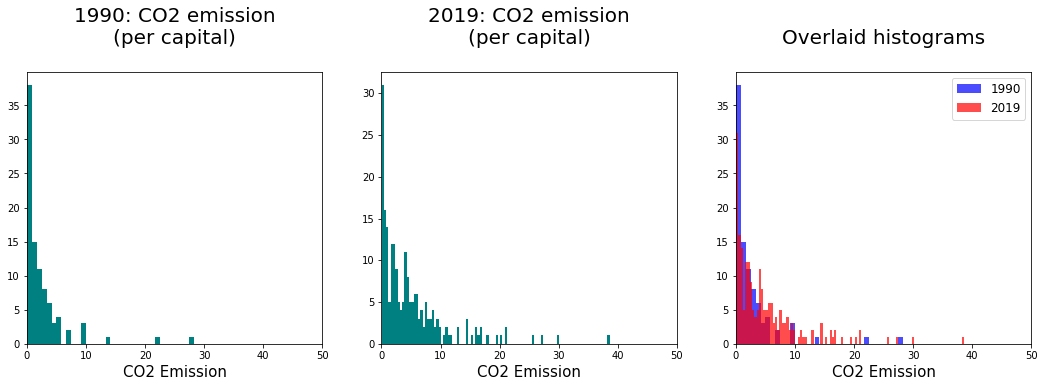

Year 1940 Desription:

Min     : 0.00
Q1      : 0.33
Median  : 1.14
Q3      : 3.11
Max     : 83.12
Mean    : 3.39
St.Dev. : 9.26


Year 2019 Desription:

Min     : 0.03
Q1      : 0.98
Median  : 3.18
Q3      : 6.54
Max     : 38.61
Mean    : 4.98
St.Dev. : 5.81




In [508]:
# 1) Provide a comprehensive description of each population (yes, that includes a histogram with a title and labeled axis).

plt.figure( figsize = (18,5))

plt.subplot(1,3,1)

plt.hist( df_1['Per capita CO2 emissions'], bins  = 100, color  = 'teal' )

plt.xlim(0,50)

plt.title ('1990: CO2 emission\n(per capital)\n', fontsize  = 20)
plt.xlabel( 'CO2 Emission' , fontsize  = 15)

#########################

plt.subplot(1,3,2)

plt.hist( df_2['Per capita CO2 emissions'], bins  = 100, color  = 'teal' )

plt.xlim(0,50)

plt.title ('2019: CO2 emission\n(per capital)\n', fontsize  = 20)
plt.xlabel( 'CO2 Emission', fontsize  = 15)

#########################

plt.subplot(1,3,3)

plt.hist( df_1['Per capita CO2 emissions'], bins  = 100, alpha = 0.7, color  = 'blue' ,label = '1990')
plt.hist( df_2['Per capita CO2 emissions'], bins  = 100, alpha = 0.7, color  = 'red' ,label = '2019' )

plt.xlim(0,50)

plt.legend(fontsize = 12)

plt.title ('Overlaid histograms\n', fontsize  = 20)
plt.xlabel( 'CO2 Emission', fontsize  = 15)

plt.show()


# 5 number statistics + mean and standard deviation

def five_num_stats(year, data):
  print(f'Year {year} Desription:\n')
  #quartile calculation
  quartiles = np.percentile(data, [25, 50, 75])
  #min max calculation
  data_min, data_max = data.min(), data.max()

  #print summary
  print('Min     : %.2f' % data_min)
  print('Q1      : %.2f' % quartiles[0])
  print('Median  : %.2f' % quartiles[1])
  print('Q3      : %.2f' % quartiles[2])
  print('Max     : %.2f' % data_max)
  print('Mean    : %.2f' % np.mean(data))
  print('St.Dev. : %.2f' % np.std(data))
  print('\n')

  return None

five_num_stats(year1, df_1['Per capita CO2 emissions'])
five_num_stats(year2, df_2['Per capita CO2 emissions'])

In [509]:
# 2 Is there a difference in the average  CO2  emission per capital between those years? Test using a  5%  level of significance and a data sample of  n=50  countries using the simple  t  statistic.


In [510]:
def hypothesis_simple_t_test(sample1, sample2, sample_size, alpha):

    x_bar_1 = np.mean(sample1)
    x_bar_2 = np.mean(sample2)
    s1 = statistics.stdev(sample1)
    s2 = statistics.stdev(sample2)
    print(f'H0: mu({year1}) = mu({year1})')
    print(f'Ha: mu({year2}) != mu({year2})\n')
#    s = np.std(sample)    
    t_stat = (x_bar_1 - x_bar_2)/(np.sqrt( (s1*s1/sample_size) + (s2*s2/sample_size) ) )

    if t_stat >= 0:
        statistic_type = 0
#        print('Right Hand Statistics:')
    else:
        statistic_type = 1
#       print('Left Hand Statistics:')
    
    if statistic_type == 0:
        #p_val = norm.cdf(z_bar)
        #p_val = (1-norm.cdf(t_stat) )*2
        p_val = (1-t.cdf(t_stat, sample_size-1) )*2
    elif statistic_type == 1:
        #p_val = norm.cdf(z_bar)
        #p_val = (norm.cdf(t_stat) )*2
        p_val = (t.cdf(t_stat, sample_size-1) )*2

    if p_val < alpha:
        print(f'Your p_value = {np.round(p_val*100,4)} % is smaller than the indicated confidence of {alpha*100} %\nYour null hypothesis H0 must be rejected.\n')
        print(f'Type I error: We think that the average CO2 emission has changed, when in fact it has remained the same.\n')
        return False
    else:
        print(f'Your p_value = {np.round(p_val*100,4)} % is greater than the indicated confidence of {alpha*100} %\nYour null hypothesis H0 should not be rejected.\n')
        print(f'Type II error: We think that the average average CO2 emission has remained the same, when in fact it has changed.\n')
        return True

In [511]:
simple_t_test_results = []
for i in range (num_test):
    next_df = list(df_1['Per capita CO2 emissions'])
    sample_1 = random.sample(next_df, n)
    next_df = list(df_2['Per capita CO2 emissions'])
    sample_2 = random.sample(next_df, n)

    simple_t_test_results.append(hypothesis_simple_t_test(sample_1, sample_2, n ,alpha = alpha))

H0: mu(1940) = mu(1940)
Ha: mu(2019) != mu(2019)

Your p_value = 35.34 % is greater than the indicated confidence of 5.0 %
Your null hypothesis H0 should not be rejected.

Type II error: We think that the average average CO2 emission has remained the same, when in fact it has changed.

H0: mu(1940) = mu(1940)
Ha: mu(2019) != mu(2019)

Your p_value = 38.625 % is greater than the indicated confidence of 5.0 %
Your null hypothesis H0 should not be rejected.

Type II error: We think that the average average CO2 emission has remained the same, when in fact it has changed.

H0: mu(1940) = mu(1940)
Ha: mu(2019) != mu(2019)

Your p_value = 22.189 % is greater than the indicated confidence of 5.0 %
Your null hypothesis H0 should not be rejected.

Type II error: We think that the average average CO2 emission has remained the same, when in fact it has changed.

H0: mu(1940) = mu(1940)
Ha: mu(2019) != mu(2019)

Your p_value = 31.4675 % is greater than the indicated confidence of 5.0 %
Your null hy

In [512]:
# 3 Is there a difference in the average  CO2  emission per capital between those years? Test using a  5%  level of significance and a data sample of  n=50  countries using the matched  t  statistic.

In [513]:
def hypothesis_matched_t_test(sample1, sample2, sample_size, alpha):

    x_bar_1 = np.mean(sample1)
    x_bar_2 = np.mean(sample2)
    stand_error = statistics.stdev(sample1 - sample2) / np.sqrt(sample_size)

    print(f'H0: mu({year1}) = mu({year2})')
    print(f'Ha: mu({year1}) != mu({year2})\n')
#    s = np.std(sample)    
    t_stat = (x_bar_1 - x_bar_2)/(stand_error)

    if t_stat >= 0:
        statistic_type = 0
#        print('Right Hand Statistics:')
    else:
        statistic_type = 1
#       print('Left Hand Statistics:')
    
    if statistic_type == 0:
        #p_val = norm.cdf(z_bar)
        #p_val = (1-norm.cdf(t_stat) )*2
        p_val = (1-t.cdf(t_stat, n-1) )*2
    elif statistic_type == 1:
        #p_val = norm.cdf(z_bar)
        #p_val = (norm.cdf(t_stat) )*2
        p_val = (t.cdf(t_stat, n-1) )*2
    if p_val < alpha:
        print(f'Your p_value = {np.round(p_val*100,4)} % is smaller than the indicated confidence of {alpha*100} %\nYour null hypothesis H0 must be rejected.\n')
        print(f'Type I error: We think that the average CO2 emission has changed, when in fact it has remained the same.\n')
        return False
    else:
        print(f'Your p_value = {np.round(p_val*100,4)} % is greater than the indicated confidence of {alpha*100} %\nYour null hypothesis H0 should not be rejected.\n')
        print(f'Type II error: We think that the average average CO2 emission has remained the same, when in fact it has changed.\n')
        return True
    
    

In [514]:
# mathcing : not too elegant but it works
matched_t_test_results = []
for i in range (num_test):
    popultion_data = np.zeros( ( n, 2 ))

    count=0

    for i in range(n):
        
        count+=1
        
        next_df = list(df_1['Entity'])
        rand_country = random.sample(next_df,1)[0] # select random country from list 1
        while rand_country == 'nan':
          rand_country = random.sample(next_df,1)[0] # select random country from list 1
      
            
        check_lists = rand_country in list(df_2019['Entity']) # check if random country in list 2

        if check_lists == 1:
          popultion_data[i,0] = df_1.loc[df['Entity'] == rand_country]['Per capita CO2 emissions']
          popultion_data[i,1] = df_2.loc[df['Entity'] == rand_country]['Per capita CO2 emissions']
        else:
          i = i-1

        if count == 5* list(df_1['Code']):
          count = 0
          print('Reduce sample number and rerun the for loop')


    popultion_data = popultion_data.T # transpose so it is easier to work 

    # Hypothesis test

    matched_t_test_results.append(hypothesis_matched_t_test(popultion_data[0], popultion_data[1], n, alpha = alpha))

H0: mu(1940) = mu(2019)
Ha: mu(1940) != mu(2019)

Your p_value = 45.5859 % is greater than the indicated confidence of 5.0 %
Your null hypothesis H0 should not be rejected.

Type II error: We think that the average average CO2 emission has remained the same, when in fact it has changed.

H0: mu(1940) = mu(2019)
Ha: mu(1940) != mu(2019)

Your p_value = 1.1971 % is smaller than the indicated confidence of 5.0 %
Your null hypothesis H0 must be rejected.

Type I error: We think that the average CO2 emission has changed, when in fact it has remained the same.

H0: mu(1940) = mu(2019)
Ha: mu(1940) != mu(2019)

Your p_value = 0.6683 % is smaller than the indicated confidence of 5.0 %
Your null hypothesis H0 must be rejected.

Type I error: We think that the average CO2 emission has changed, when in fact it has remained the same.

H0: mu(1940) = mu(2019)
Ha: mu(1940) != mu(2019)

Your p_value = 0.0 % is smaller than the indicated confidence of 5.0 %
Your null hypothesis H0 must be rejected.

T

In [515]:
print(f'Simple t test:\n\tGiven our parameters, the null hypothesis couldn`t be rejected: {np.round( (np.sum(simple_t_test_results)/num_test)*100 ,2 )} % of times.\n')
print(f'Matched t test:\n\tGiven our parameters, the null hypothesis couldn`t be rejected: {np.round( (np.sum(matched_t_test_results)/num_test)*100, 2)} % of times.\n')

Simple t test:
	Given our parameters, the null hypothesis couldn`t be rejected: 84.0 % of times.

Matched t test:
	Given our parameters, the null hypothesis couldn`t be rejected: 10.0 % of times.

